In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Create your connection.
cnx = sqlite3.connect('E:\\Database\\database.sqlite')
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())
#df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [3]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.isnull().any() #has missing values

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking       

In [7]:
#dropping few columns like ids and date
del_list = ["id", "player_fifa_api_id", "player_api_id" ,"date","preferred_foot","attacking_work_rate","defensive_work_rate"]
df = df.drop(del_list , axis = 1)
df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [8]:
(df[df.columns]==0).sum()     #no zero values

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [9]:
#treating missing values
df.fillna(df.mean(), inplace= True)
df.isnull().sum()
#df.isnull().any()

overall_rating        0
potential             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
gk_diving             0
gk_handling           0
gk_kicking            0
gk_positioning        0
gk_reflexes           0
dtype: int64

In [10]:
df_y = df["overall_rating"]                         #categorizing into independent and dependent variables
df_x = df.drop("overall_rating", axis =1)

In [11]:
#df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
overall_rating        183978 non-null float64
potential             183978 non-null float64
crossing              183978 non-null float64
finishing             183978 non-null float64
heading_accuracy      183978 non-null float64
short_passing         183978 non-null float64
volleys               183978 non-null float64
dribbling             183978 non-null float64
curve                 183978 non-null float64
free_kick_accuracy    183978 non-null float64
long_passing          183978 non-null float64
ball_control          183978 non-null float64
acceleration          183978 non-null float64
sprint_speed          183978 non-null float64
agility               183978 non-null float64
reactions             183978 non-null float64
balance               183978 non-null float64
shot_power            183978 non-null float64
jumping               183978 non-null float64
stamina        

In [12]:
from sklearn.cross_validation import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(df_x, df_y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (147182, 34)
xtest shape  :  (36796, 34)
ytrain shape :  (147182,)
ytest shape  :  (36796,)


C:\Users\thanusha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
lm.intercept_

-3.672856834315354

In [15]:
lm.coef_

array([ 0.37947268,  0.02154027,  0.01227143,  0.06951014,  0.05068208,
        0.00327132, -0.01190358,  0.01097712,  0.01361096,  0.00682246,
        0.13512446,  0.00608986,  0.00940542, -0.00902502,  0.2090659 ,
        0.00754906,  0.0158566 ,  0.01620606, -0.00432191,  0.06149326,
       -0.01299393,  0.02044046,  0.01244939, -0.00964048, -0.00274717,
        0.01339353,  0.03364462,  0.00357979, -0.02970637,  0.16594946,
        0.03165185, -0.03289276,  0.05455523,  0.02360024])

In [16]:
y_pred = lm.predict(xtest)    #make predictions on test data


In [17]:
from sklearn import metrics
print(metrics.mean_absolute_error(ytest, y_pred))
#absolute error

2.1503977274334187


In [18]:
import numpy as np
print(metrics.mean_squared_error(ytest, y_pred))#mean square error

7.898913975403893


In [19]:
print(np.sqrt(metrics.mean_absolute_error(ytest, y_pred))) #rms values

1.466423447518969


In [20]:
metrics.r2_score(ytest, y_pred)

0.8398004873786601

In [25]:
lm.score(df_x,df_y)

0.8413425783645935

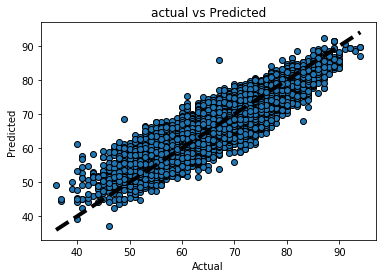

In [22]:
#plotting the actual vs predicted
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(ytest, y_pred, edgecolors=(0, 0, 0))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("actual vs Predicted")
plt.show()


In [ ]:
#84% accuracy